# BI- LSTM model met mempool data (Mepool Size)

In [1]:
# Import data
import pandas as pd

# Read the dataset without mempool data
df = pd.read_csv('C:/Users/boris/Documents/M&T/Financial Innovation/Afstuderen/Scriptie/Feature_engineering/df_geen_mempool.csv')


In [2]:
df= df.drop(columns = 'regime_change')

In [3]:
df

,Timestamp,Open,High,Low,Close,Volume,value,value_classification,daily_std,MA7,MA30,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,30.0,Fear,683.300,10602.648571,12637.540000,1
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,15.0,Extreme Fear,804.425,10250.204286,12429.063333,1
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,40.0,Fear,636.625,9956.165714,12249.274000,1
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,24.0,Extreme Fear,650.940,9484.974286,11980.415000,1
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,11.0,Extreme Fear,775.185,8862.992857,11650.574333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,70.0,Greed,1371.000,103740.571429,95361.833333,0
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,71.0,Greed,716.500,103814.142857,96010.500000,0
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,74.0,Greed,526.000,103577.571429,96617.133333,0
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,74.0,Greed,1743.000,103919.142857,97352.200000,0


In [4]:
# Check for missing values in the 'value' column
print("Number of missing values in 'value' column:", df['value'].isna().sum())

# Interpolate missing values in the 'value' column using linear interpolation
df['value'] = df['value'].interpolate(method='linear')

# Verify that all missing values are filled
print("Number of missing values after interpolation:", df['value'].isna().sum())


Number of missing values in 'value' column: 4
Number of missing values after interpolation: 0


### Mempool data toevoegen aan df

In [5]:
# Read mempool data
mempool_df = pd.read_csv('C:/Users/boris/Documents/M&T/Financial Innovation/Afstuderen/Scriptie/Feature_engineering/mempool_data.csv')


In [6]:
mempool_df

,Date,mempool_transaction_count,MempoolSizeBytes,avg_fee_usd
0,2018-02-01,9.784452,17.768706,4.351634
1,2018-02-02,9.764333,17.773003,4.305297
2,2018-02-03,9.743801,17.777281,4.393192
3,2018-02-04,9.394608,17.405676,4.578901
4,2018-02-05,8.853456,16.807729,4.889506
...,...,...,...,...
2651,2025-05-06,8.574361,14.885169,4.619751
2652,2025-05-07,8.498121,15.494085,4.774688
2653,2025-05-08,8.415585,15.869819,4.990036
2654,2025-05-09,8.391017,15.795769,5.078121


In [7]:
# Convert 'Date' column to datetime
mempool_df['Date'] = pd.to_datetime(mempool_df['Date'])

# Rename 'Date' column to 'Timestamp' to match df
mempool_df = mempool_df.rename(columns={'Date': 'Timestamp'})

# Set Timestamp as index to match format with df
mempool_df.set_index('Timestamp', inplace=True)


In [8]:
mempool_df.reset_index()

,Timestamp,mempool_transaction_count,MempoolSizeBytes,avg_fee_usd
0,2018-02-01,9.784452,17.768706,4.351634
1,2018-02-02,9.764333,17.773003,4.305297
2,2018-02-03,9.743801,17.777281,4.393192
3,2018-02-04,9.394608,17.405676,4.578901
4,2018-02-05,8.853456,16.807729,4.889506
...,...,...,...,...
2651,2025-05-06,8.574361,14.885169,4.619751
2652,2025-05-07,8.498121,15.494085,4.774688
2653,2025-05-08,8.415585,15.869819,4.990036
2654,2025-05-09,8.391017,15.795769,5.078121


In [9]:
# Reset index of both dataframes before merging
df = df.reset_index()
mempool_df = mempool_df.reset_index()

# Convert Timestamp columns to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
mempool_df['Timestamp'] = pd.to_datetime(mempool_df['Timestamp'])

# Merge df with mempool_df on Timestamp
df = pd.merge(df, mempool_df, on='Timestamp', how='left')

# Set Timestamp back as index
df.set_index('Timestamp', inplace=True)

# Check the merged dataframe
df


,index,Open,High,Low,Close,Volume,value,value_classification,daily_std,MA7,MA30,market_regime,mempool_transaction_count,MempoolSizeBytes,avg_fee_usd
Timestamp,,,,,,,,,,,,,,,
2018-02-01,0,9974.91,10187.56,8820.96,8970.00,20517.085284,30.0,Fear,683.300,10602.648571,12637.540000,1,9.784452,17.768706,4.351634
2018-02-02,1,8970.00,9234.10,7625.25,8580.00,47828.982222,15.0,Extreme Fear,804.425,10250.204286,12429.063333,1,9.764333,17.773003,4.305297
2018-02-03,2,8551.19,9443.96,8170.71,9386.72,17968.929040,40.0,Fear,636.625,9956.165714,12249.274000,1,9.743801,17.777281,4.393192
2018-02-04,3,9391.30,9491.20,8189.32,8301.65,14407.720751,24.0,Extreme Fear,650.940,9484.974286,11980.415000,1,9.394608,17.405676,4.578901
2018-02-05,4,8301.65,8416.03,6865.66,6877.61,37314.242065,11.0,Extreme Fear,775.185,8862.992857,11650.574333,1,8.853456,16.807729,4.889506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,2660,103514.00,104184.00,101442.00,103793.00,1339.093301,70.0,Greed,1371.000,103740.571429,95361.833333,0,NaN,NaN,NaN
2025-05-16,2661,103800.00,104570.00,103137.00,103506.00,994.760377,71.0,Greed,716.500,103814.142857,96010.500000,0,NaN,NaN,NaN
2025-05-17,2662,103503.00,103720.00,102668.00,103153.00,459.809889,74.0,Greed,526.000,103577.571429,96617.133333,0,NaN,NaN,NaN


In [10]:
# Save the dataframe with all features to CSV
df.to_csv('df_alle_features.csv')


In [11]:
# Keep only rows where data is available for all columns (drop rows with any NaN values)
df = df.dropna(how='any')

In [12]:
# Get first and last date from the DataFrame
first_date = df.index[0]
last_date = df.index[-1]

print(f"First date in dataset: {first_date}")
print(f"Last date in dataset: {last_date}")


First date in dataset: 2018-02-01 00:00:00
Last date in dataset: 2025-05-10 00:00:00


In [13]:
# pip install tensorflow


In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM


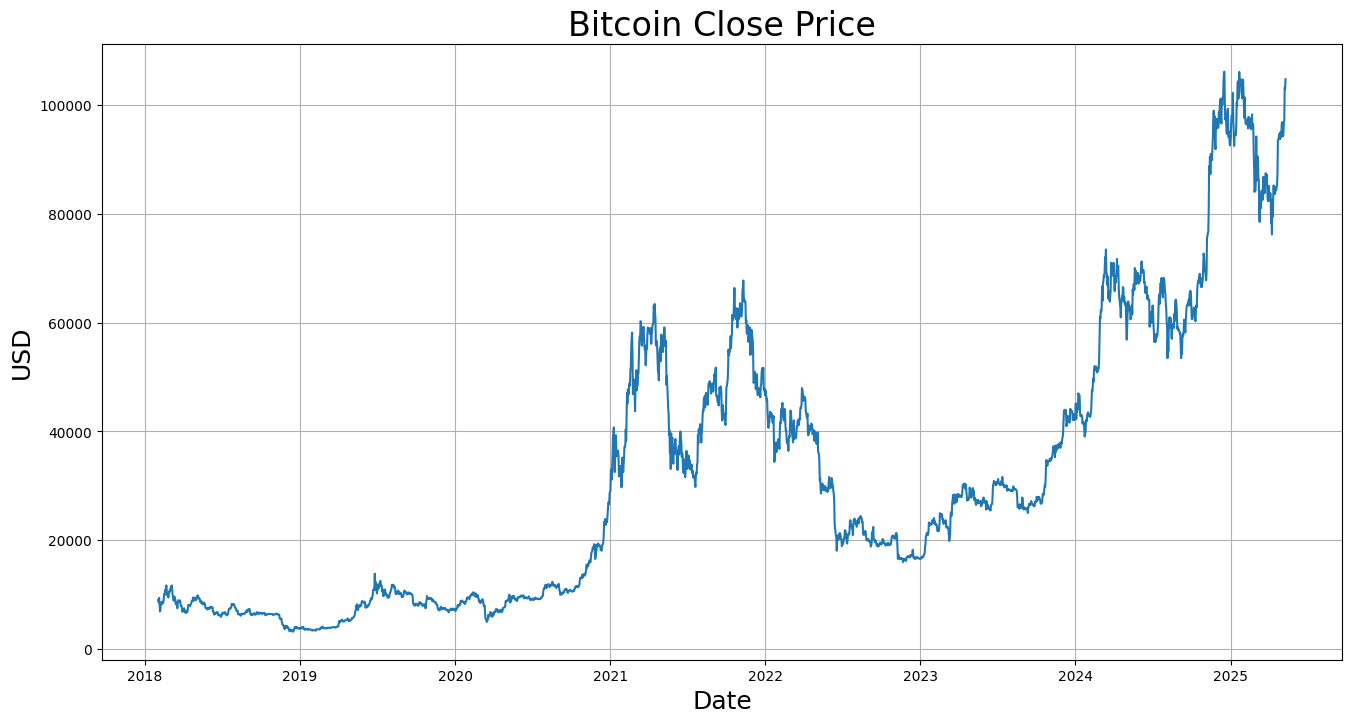

In [15]:
plt.figure(figsize=(16, 8))
plt.title('Bitcoin Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.grid(True)
plt.show()


# mempool size toevoegen aan de features 

In [16]:
feature_columns = ['Close', 'Volume', 'value', 'daily_std', 
                  'MA7', 'MA30', 'market_regime', 'MempoolSizeBytes']

# Maak features en target sets
features = df[feature_columns].values  # numpy array van alle features
target = df[['Close']].values  # Doel is nog steeds de Close prijs

# Train-val-test splits indices zoals eerder
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15) 
test_size = len(df) - train_size - val_size

train_end = train_size
val_end = train_size + val_size

In [17]:
# Splits features en target in train, val, test
train_features = features[:train_end]
val_features = features[train_end:val_end]
test_features = features[val_end:]

train_target = target[:train_end]
val_target = target[train_end:val_end]
test_target = target[val_end:]

In [18]:
# Normaliseer ALLE features op basis van training set
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_features)
val_scaled = scaler.transform(val_features)
test_scaled = scaler.transform(test_features)

In [19]:
# Target schaal apart houden en fitten op train target
target_scaler = MinMaxScaler(feature_range=(0,1))
train_target_scaled = target_scaler.fit_transform(train_target)
val_target_scaled = target_scaler.transform(val_target)
test_target_scaled = target_scaler.transform(test_target)

In [ ]:

def create_sequences(features, target, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(features)):
        X.append(features[i-seq_length:i])  
        y.append(target[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, train_target_scaled)
X_val, y_val = create_sequences(val_scaled, val_target_scaled)
X_test, y_test = create_sequences(test_scaled, test_target_scaled)

# Check shapes
print("X_train shape:", X_train.shape)  
print("y_train shape:", y_train.shape)

X_train shape: (1796, 60, 8)
y_train shape: (1796, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

# Bi-LSTM model 
model = Sequential()
model.add(Bidirectional(
    LSTM(units=64, return_sequences=False),  # gebruik alleen output van laatste tijdstap
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(Dense(units=1))  # output = voorspelling van Close op dag t+1

# Compileer model
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Iteratie 1

In [22]:
# Train model with early stopping and validation data
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - loss: 0.0230 - val_loss: 0.0028
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 8.3100e-04 - val_loss: 0.0015
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.0843e-04 - val_loss: 0.0026
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 7.4261e-04 - val_loss: 0.0021
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 7.4749e-04 - val_loss: 0.0015
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.4282e-04 - val_loss: 0.0013
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.4388e-04 - val_loss: 0.0014
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.0144e-04 - val_loss: 0.0027
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 6.6449e-04 - val_loss: 0.0013
Epoch 12/100
57/57

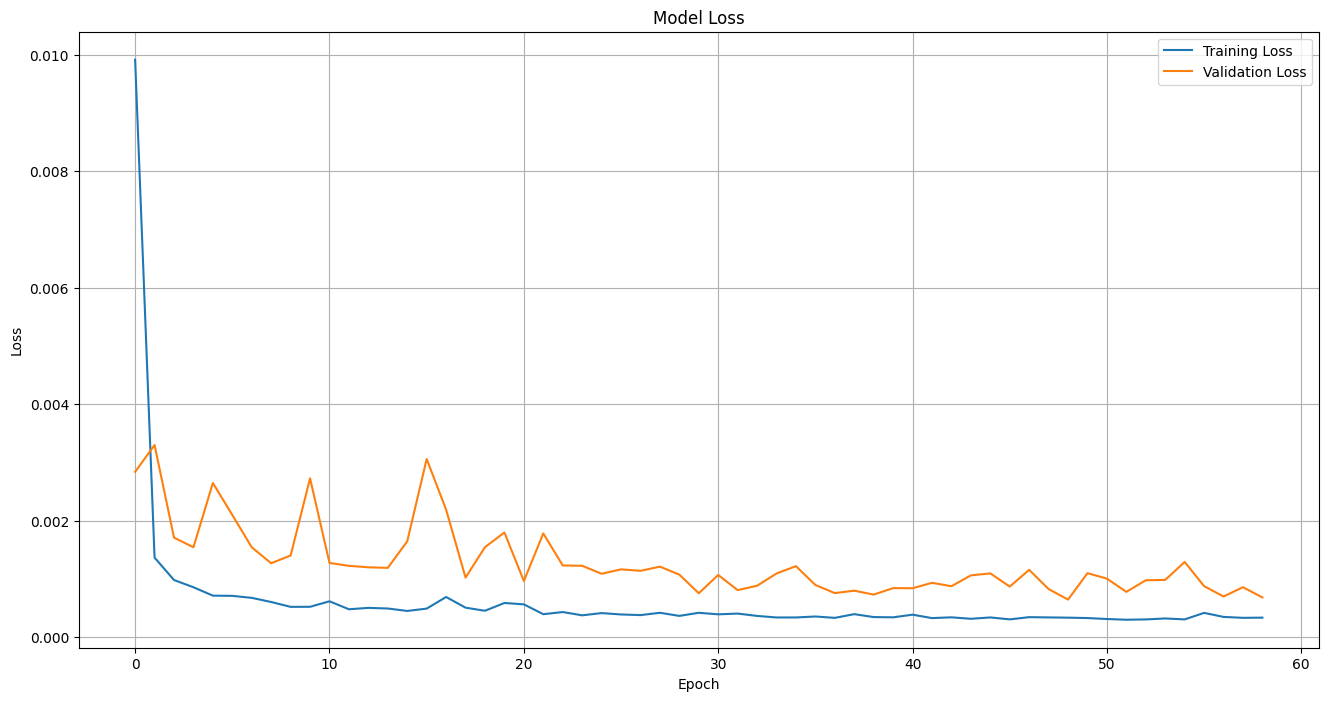

In [24]:
# Plot training and validation loss
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

# Make predictions on validation set
val_predictions = model.predict(X_val)

# Calculate RMSE on unscaled predictions
val_rmse = np.sqrt(mean_squared_error(
    target_scaler.inverse_transform(y_val.reshape(-1, 1)),
    target_scaler.inverse_transform(val_predictions)
))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((target_scaler.inverse_transform(y_val.reshape(-1, 1)) - 
                       target_scaler.inverse_transform(val_predictions)) / 
                       target_scaler.inverse_transform(y_val.reshape(-1, 1)))) * 100

print(f'Validation RMSE: ${val_rmse:,.2f}')
print(f'Validation MAPE: {mape:.2f}%')


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step
Validation RMSE: $1,641.04
Validation MAPE: 2.64%


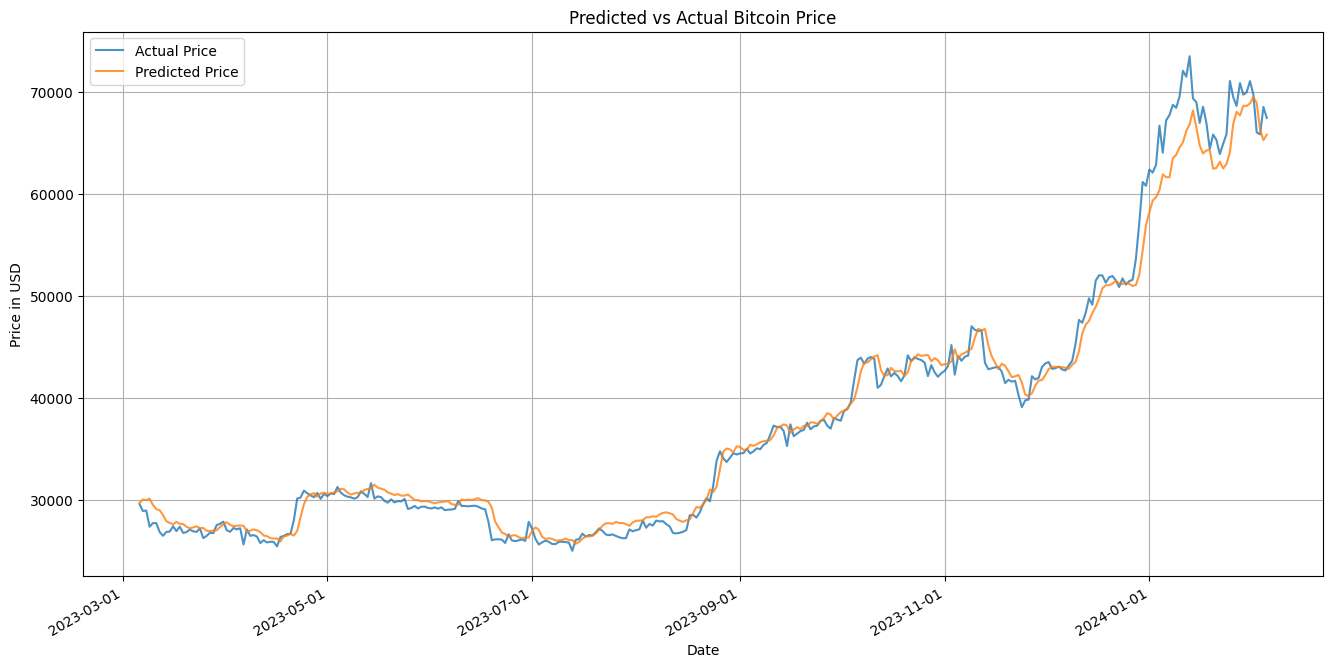

In [26]:
# For better date visualization, we can use the actual dates
# First define training size and sequence length
training_size = len(X_train)
sequence_length = X_train.shape[1]  # Get sequence length from training data shape

# Get the dates corresponding to validation set
val_dates = df.index[training_size+sequence_length:training_size+len(y_val)+sequence_length]

# Show the unscaled version
unscaled_y_val = target_scaler.inverse_transform(y_val.reshape(-1, 1))
unscaled_predictions = target_scaler.inverse_transform(val_predictions)

plt.figure(figsize=(16, 8))
plt.plot(val_dates, unscaled_y_val, label='Actual Price', alpha=0.8)
plt.plot(val_dates, unscaled_predictions, label='Predicted Price', alpha=0.8)
plt.title('Predicted vs Actual Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Format x-axis to show dates properly
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
from matplotlib.dates import DateFormatter
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.show()


# Iteratie 2: expirimenteren met hogere patience

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

# Bi-LSTM model met extra Dense-laag
model_iteration2 = Sequential()
model_iteration2.add(Bidirectional(
    LSTM(units=64, return_sequences=False),
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model_iteration2.add(Dense(units=32, activation='relu'))  # extra Dense-laag
model_iteration2.add(Dense(units=1))  # outputlaag

# Compileer model
model_iteration2.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train model with early stopping and validation data
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_iteration2 = EarlyStopping(
    monitor='val_loss',
    patience=15, 
    restore_best_weights=True
)

history_iteration2 = model_iteration2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_iteration2],
    verbose=1
)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0167 - val_loss: 0.0044
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.1766e-04 - val_loss: 0.0035
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 9.3265e-04 - val_loss: 0.0021
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 7.4011e-04 - val_loss: 0.0016
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.7998e-04 - val_loss: 0.0021
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.8985e-04 - val_loss: 0.0020
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 6.9626e-04 - val_loss: 0.0016
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.6349e-04 - val_loss: 0.0017
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.0521e-04 - val_loss: 0.0018
Epoch 12/100
57/57 ━

In [29]:
# Make predictions on validation set
val_predictions_iteration2 = model_iteration2.predict(X_val)

# Unscale predictions and actual values
unscaled_y_val = target_scaler.inverse_transform(y_val.reshape(-1, 1))
unscaled_predictions = target_scaler.inverse_transform(val_predictions_iteration2)

# Calculate RMSE
val_rmse_iteration2 = np.sqrt(mean_squared_error(unscaled_y_val, unscaled_predictions))

# Calculate MAPE
val_mape_iteration2 = np.mean(np.abs((unscaled_y_val - unscaled_predictions) / unscaled_y_val)) * 100

print(f"Validation RMSE (Iteration 2): ${val_rmse_iteration2:,.2f}")
print(f"Validation MAPE (Iteration 2): {val_mape_iteration2:.2f}%")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Validation RMSE (Iteration 2): $1,765.97
Validation MAPE (Iteration 2): 3.30%


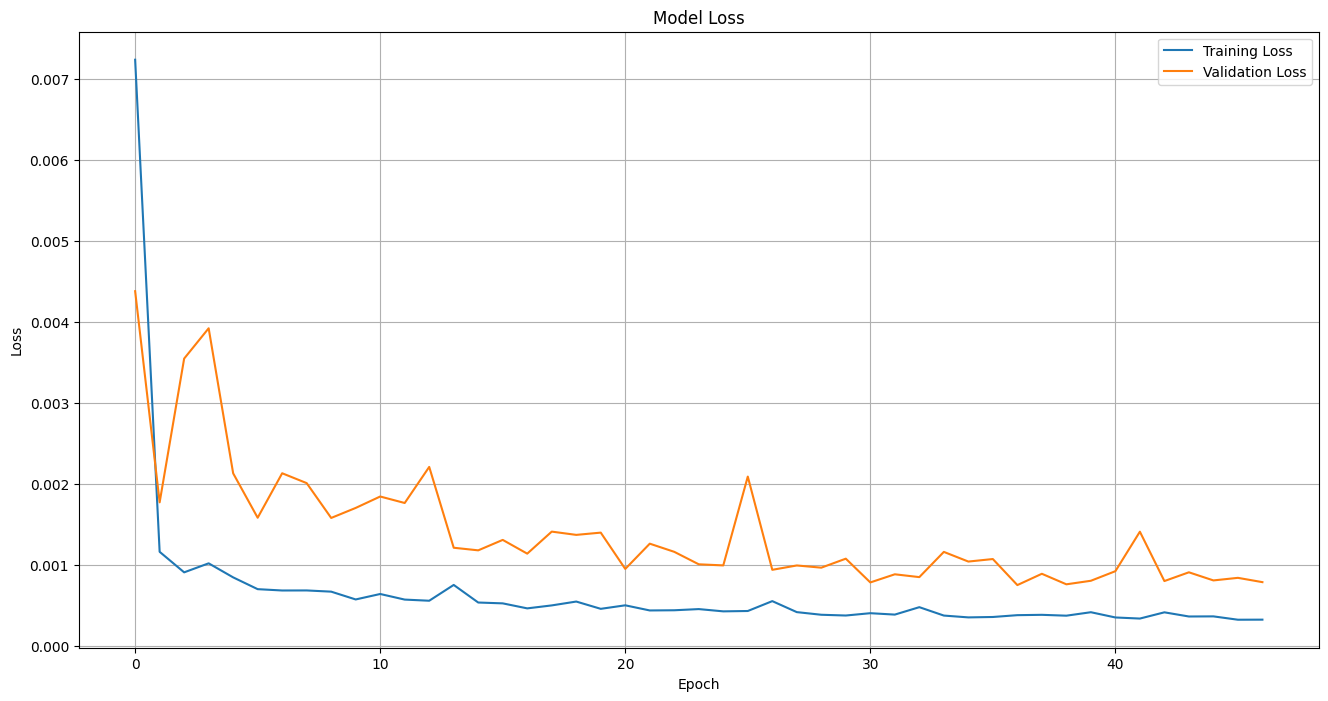

In [30]:
# Plot training and validation loss
plt.figure(figsize=(16,8))
plt.plot(history_iteration2.history['loss'], label='Training Loss')
plt.plot(history_iteration2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


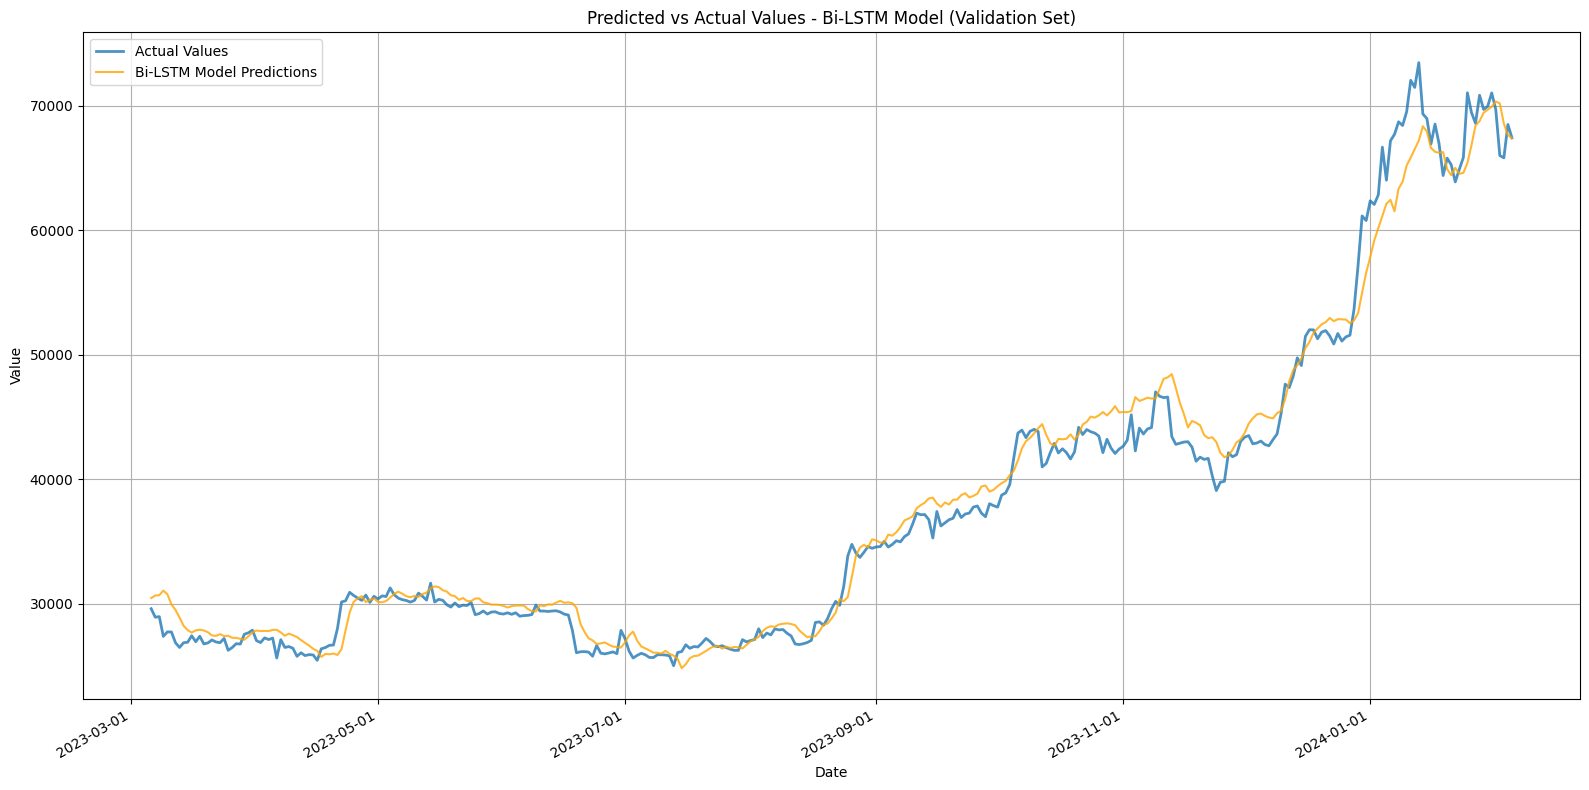

In [31]:
# Get validation dates
val_dates = df.index[training_size+sequence_length:training_size+len(y_val)+sequence_length]

# Create comparison plot
plt.figure(figsize=(16, 8))
plt.plot(val_dates, unscaled_y_val, label='Actual Values', linewidth=2, alpha=0.8)
plt.plot(val_dates, unscaled_predictions, label='Bi-LSTM Model Predictions', color='orange', alpha=0.8)
plt.title('Predicted vs Actual Values - Bi-LSTM Model (Validation Set)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()


# Iteratie 3: even expirimenteren met wat er gebeurd als ik een extra lstm laag toevoeg

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

model_iteration3 = Sequential()
model_iteration3.add(Bidirectional(
    LSTM(50, return_sequences=True),
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model_iteration3.add(Bidirectional(
    LSTM(50, return_sequences=False)
))
model_iteration3.add(Dense(25))
model_iteration3.add(Dense(1))

# Compile model with lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_iteration3.compile(optimizer=optimizer, loss='mean_squared_error')

# Train model with early stopping
early_stopping_iteration3 = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history_iteration3 = model_iteration3.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_iteration3],
    verbose=1
)


Epoch 1/100


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 0.0542 - val_loss: 0.0049
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0014 - val_loss: 0.0027


In [33]:
# Calculate validation RMSE and MAPE for iteration 3
val_predictions_iter3 = model_iteration3.predict(X_val)

# Unscale predictions and actual values
unscaled_y_val_iter3 = target_scaler.inverse_transform(y_val.reshape(-1, 1))
unscaled_predictions_iter3 = target_scaler.inverse_transform(val_predictions_iter3)

# Calculate RMSE
val_rmse_iter3 = np.sqrt(mean_squared_error(unscaled_y_val_iter3, unscaled_predictions_iter3))

# Calculate MAPE
val_mape_iter3 = np.mean(np.abs((unscaled_y_val_iter3 - unscaled_predictions_iter3) / unscaled_y_val_iter3)) * 100

print(f"Validation RMSE Iteration 3: ${val_rmse_iter3:,.2f}")
print(f"Validation MAPE Iteration 3: {val_mape_iter3:.2f}%")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
Validation RMSE Iteration 3: $3,003.21
Validation MAPE Iteration 3: 4.74%


# Grid Search

In [37]:
# import itertools
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Bidirectional
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import mean_squared_error

# # Define parameter grid
# param_grid = {
#     'units': [25, 64, 150],  # Units per layer
#     'num_layers': [1], 
#     'bidirectional': [True],  # Always True for this setup
#     'dropout': [0.0, 0.2, 0.3],
#     'recurrent_dropout': [0.0, 0.2, 0.3],
#     'batch_size': [16, 32, 64],
#     'learning_rate': [0.01, 0.005, 0.001],
#     'epochs': [100]
# }

# # Key list
# base_keys = ['units', 'num_layers', 'bidirectional','dropout', 'recurrent_dropout', 'batch_size', 'learning_rate', 'epochs']
# base_values = [param_grid[k] for k in base_keys]
# base_combinations = list(itertools.product(*base_values))

# results = []

# for base in base_combinations:
#     config = dict(zip(base_keys, base))

#     tf.keras.backend.clear_session()

#     model = Sequential()
#     model.add(Bidirectional(LSTM(units=config['units'],
#                             return_sequences=False,
#                             dropout=config['dropout'], 
#                             recurrent_dropout=config['recurrent_dropout']),
#                             input_shape=(X_train.shape[1], X_train.shape[2])))

#     model.add(Dense(25))  # Intermediate layer
#     model.add(Dense(1))  # Output layer

#     model.compile(optimizer=Adam(learning_rate=config['learning_rate']), loss='mean_squared_error')

#     early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#     history = model.fit(X_train, y_train,
#                         validation_data=(X_val, y_val),
#                         epochs=config['epochs'],
#                         batch_size=config['batch_size'],
#                         callbacks=[early_stop],
#                         verbose=0)

#     val_pred = model.predict(X_val, verbose=0)
#     rmse = np.sqrt(mean_squared_error(y_val, val_pred))

#     results.append({**config, 'val_rmse': rmse})

# # Select the best configuration
# best_config = min(results, key=lambda x: x['val_rmse'])

# print("\nBeste hyperparameters gevonden na grid search:")
# print("---------------------------------------------------------------")
# print(f"Number of units (LSTM): {best_config['units']}")
# print(f"Number of LSTM layers: {best_config['num_layers']}")
# print(f"Bidirectional: {best_config['bidirectional']}")
# print(f"Dropout: {best_config['dropout']}")
# print(f"Recurrent Dropout: {best_config['recurrent_dropout']}")
# print(f"Batch size: {best_config['batch_size']}")
# print(f"Learning rate: {best_config['learning_rate']}")
# print(f"Number of epochs: {best_config['epochs']} (early stopping was actief)")


# Train model met beste hyperparameters op basis van Grid Search resultaten

In [ ]:
# Bi-LSTM model volgens Figure 6 uit het paper
model_iteration4 = Sequential()
model_iteration4.add(Bidirectional(
    LSTM(units=64, return_sequences=False),  # gebruik alleen output van laatste tijdstap
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model_iteration4.add(Dense(units=32))  # Extra dense layer met 32 units
model_iteration4.add(Dense(units=1))  # output = voorspelling van Close op dag t+1

# Compile model with higher learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Increased learning rate
model_iteration4.compile(optimizer=optimizer, loss='mean_squared_error')

# Train model with early stopping
early_stopping_iteration4 = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_iteration4 = model_iteration4.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_iteration4],
    verbose=1
)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


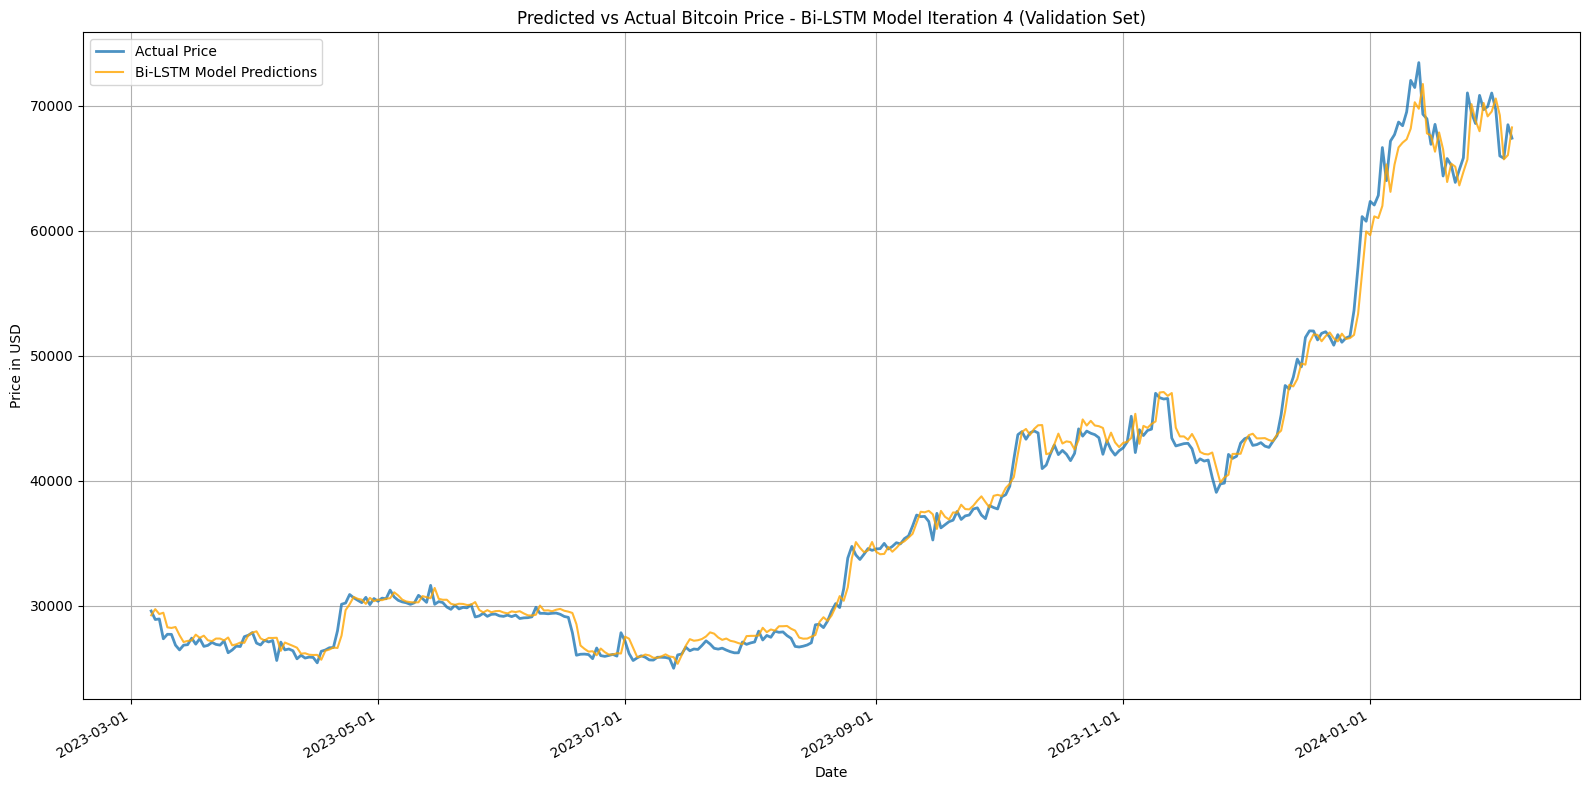

In [63]:
# Make predictions on validation set
val_predictions_iter4 = model_iteration4.predict(X_val)

# Unscale predictions and actual values
unscaled_y_val_iter4 = target_scaler.inverse_transform(y_val.reshape(-1, 1))
unscaled_predictions_iter4 = target_scaler.inverse_transform(val_predictions_iter4)

# Get validation dates
val_dates = df.index[training_size+sequence_length:training_size+len(y_val)+sequence_length]

# Create comparison plot
plt.figure(figsize=(16, 8))
plt.plot(val_dates, unscaled_y_val_iter4, label='Actual Price', linewidth=2, alpha=0.8)
plt.plot(val_dates, unscaled_predictions_iter4, label='Bi-LSTM Model Predictions', color='orange', alpha=0.8)
plt.title('Predicted vs Actual Bitcoin Price - Bi-LSTM Model Iteration 4 (Validation Set)')
plt.xlabel('Date') 
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()


In [67]:
val_rmse_iter4 = np.sqrt(mean_squared_error(unscaled_y_val_iter4, unscaled_predictions_iter4))

# Calculate validation MAPE
val_mape_iter4 = np.mean(np.abs((unscaled_y_val_iter4 - unscaled_predictions_iter4) / unscaled_y_val_iter4)) * 100

print(f"Validation RMSE Bi-LSTM Iteration 4: ${val_rmse_iter4:,.2f}")
print(f"Validation MAPE Bi-LSTM Iteration 4: {val_mape_iter4:.2f}%")

Validation RMSE Bi-LSTM Iteration 4: $1,139.41
Validation MAPE Bi-LSTM Iteration 4: 1.99%


# Resultaten testen op testset:

In [64]:
# Calculate test metrics
test_predictions_iter4 = model_iteration4.predict(X_test)

# Unscale predictions and actual values
unscaled_y_test_iter4 = target_scaler.inverse_transform(y_test.reshape(-1, 1))
unscaled_test_predictions_iter4 = target_scaler.inverse_transform(test_predictions_iter4)

# Calculate RMSE
test_rmse_iter4 = np.sqrt(mean_squared_error(unscaled_y_test_iter4, unscaled_test_predictions_iter4))

# Calculate MAPE 
test_mape_iter4 = np.mean(np.abs((unscaled_y_test_iter4 - unscaled_test_predictions_iter4) / unscaled_y_test_iter4)) * 100

print(f"Test RMSE Bi-LSTM Iteration 4: ${test_rmse_iter4:,.2f}")
print(f"Test MAPE Bi-LSTM Iteration 4: {test_mape_iter4:.2f}%")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test RMSE Bi-LSTM Iteration 4: $3,801.06
Test MAPE Bi-LSTM Iteration 4: 3.53%


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


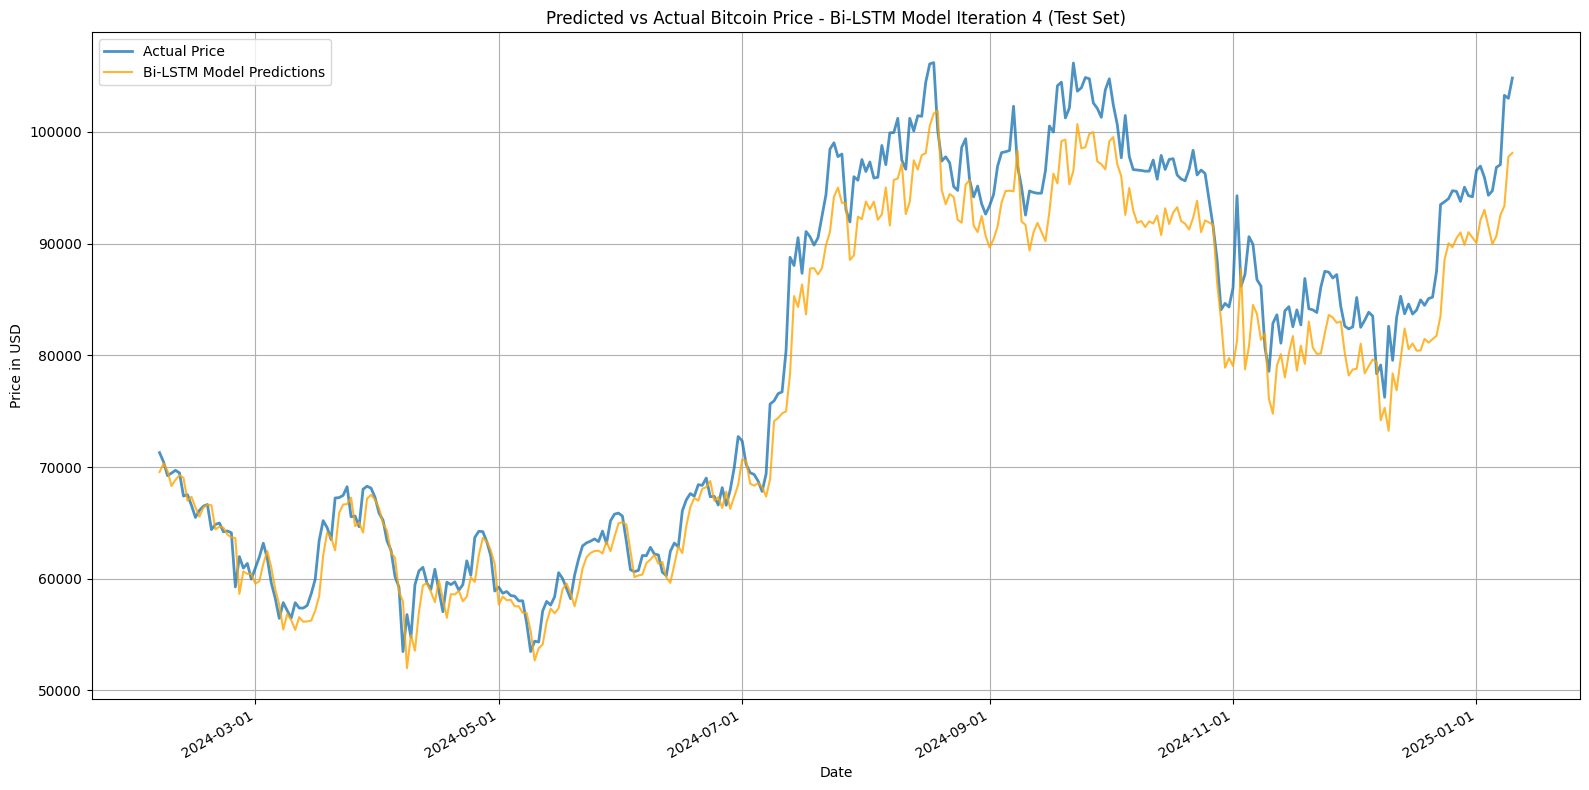

In [65]:
# Make predictions on test set
test_predictions_iter4 = model_iteration4.predict(X_test)

# Unscale predictions and actual values
unscaled_y_test_iter4 = target_scaler.inverse_transform(y_test.reshape(-1, 1))
unscaled_predictions_test_iter4 = target_scaler.inverse_transform(test_predictions_iter4)

# Get test dates
test_start_idx = training_size + len(y_val) + sequence_length
test_end_idx = test_start_idx + len(y_test)
test_dates = df.index[test_start_idx:test_end_idx]

# Create comparison plot
plt.figure(figsize=(16, 8))
plt.plot(test_dates, unscaled_y_test_iter4, label='Actual Price', linewidth=2, alpha=0.8)
plt.plot(test_dates, unscaled_predictions_test_iter4, label='Bi-LSTM Model Predictions', color='orange', alpha=0.8)
plt.title('Predicted vs Actual Bitcoin Price - Bi-LSTM Model Iteration 4 (Test Set)')
plt.xlabel('Date') 
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()


# Resultaten Vegelijken met Baseline Model: 

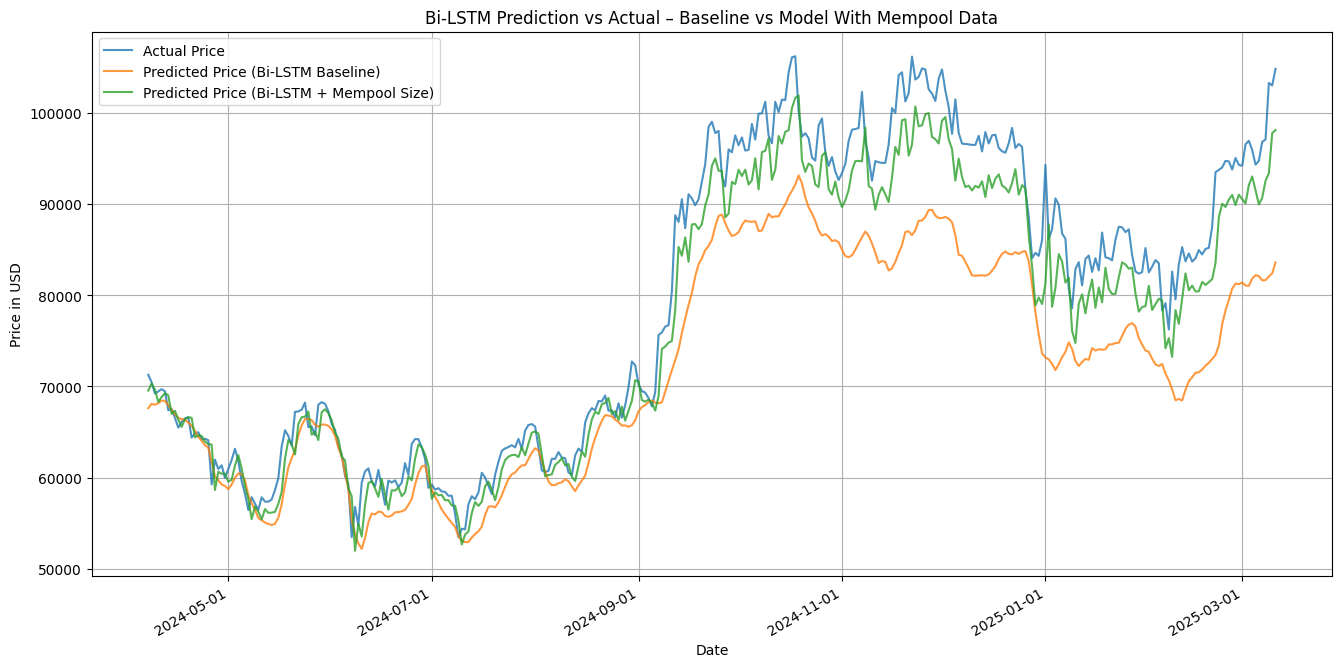

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Pad naar je opgeslagen baseline Bi-LSTM CSV
file_path_bilstm = r'C:\Users\boris\Documents\M&T\Financial Innovation\Afstuderen\Scriptie\BI-LSTM_model\bi_lstm_baseline_results_rmse_12100.01_mape_11.57.csv'

# Lees het CSV-bestand in en parse de datumkolom
df_bilstm = pd.read_csv(file_path_bilstm, parse_dates=['Date'])

# Haal de test datums op uit de CSV
test_dates = df_bilstm['Date']

# Unscale de y_test en voorspellingen van het huidige model (iteration 4)
actual_prices = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices_iter4 = target_scaler.inverse_transform(test_predictions_iter4)

# Plot de daadwerkelijke en voorspelde prijzen van beide modellen
plt.figure(figsize=(16, 8))
plt.plot(test_dates, actual_prices, label='Actual Price', alpha=0.8)
plt.plot(test_dates, df_bilstm['Predicted_Price'], label='Predicted Price (Bi-LSTM Baseline)', alpha=0.8)
plt.plot(test_dates, predicted_prices_iter4, label='Predicted Price (Bi-LSTM + Mempool Size)', alpha=0.8)

plt.title('Bi-LSTM Prediction vs Actual – Baseline vs Model With Mempool Data')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Nettere datumnotatie
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.show()
